# 1

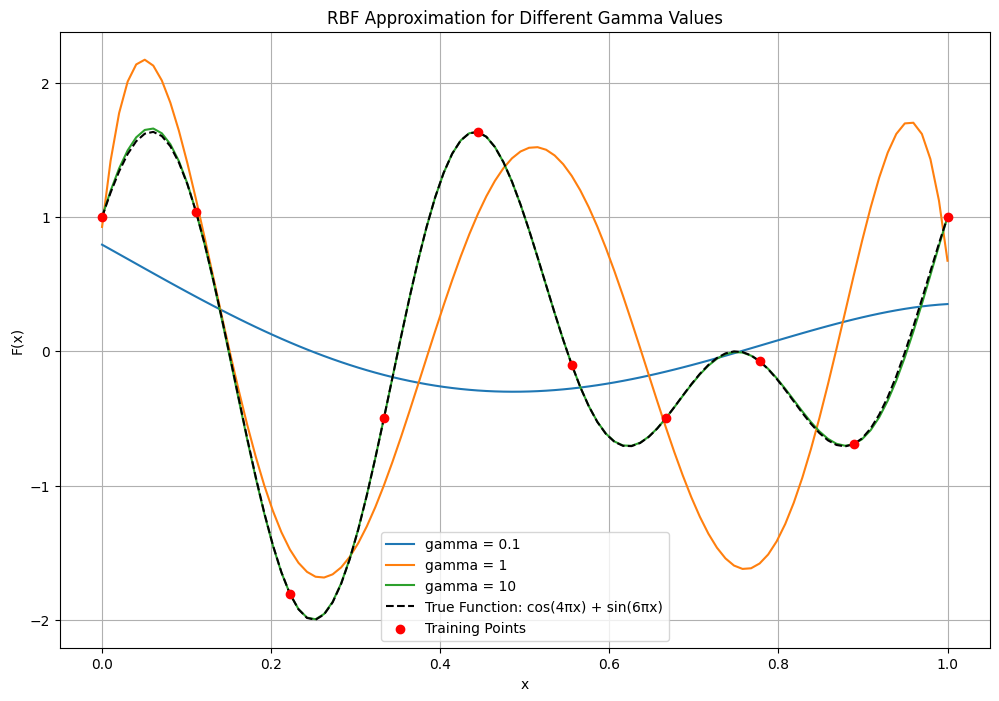

In [3]:
import numpy as np  
import matplotlib.pyplot as plt  

# target function  
def target_function(x):  
    return np.cos(4 * np.pi * x) + np.sin(6 * np.pi * x)  

# Gaussian Radial Basis Function (RBF)  
def rbf(x, mu, gamma):  
    return np.exp(-gamma * (x - mu)**2)  

# RBF network design  
def rbf_approximator(x, centers, gamma):
    # Create a zero matrix to store RBF values
    Phi = np.zeros((len(x), len(centers)))
    
    # Outer loop to iterate over points in x
    for i in range(len(x)):
        # Inner loop to iterate over centers
        for j in range(len(centers)):
            # Compute the RBF value for each point-center pair
            Phi[i, j] = rbf(x[i], centers[j], gamma)
    
    return Phi


# Initial values  
x_train = np.linspace(0, 1, 10)  # Training points  
y_train = target_function(x_train)  # True function values  
x_plot = np.linspace(0, 1, 100)  # Points for plotting  

# Centers for the hidden layer neurons  
centers = np.linspace(0, 1, len(x_train))  

# Different gamma values  
gammas = [0.1, 1, 10]  

plt.figure(figsize=(12, 8))  

# Compare models for different gamma values  
for gamma in gammas:  
    Phi_train = rbf_approximator(x_train, centers, gamma)  
    # Calculate weights: solve the linear system to find w  
    w = np.linalg.solve(Phi_train.T @ Phi_train, Phi_train.T @ y_train)  
    
    # Compute RBF output for continuous values  
    Phi_plot = rbf_approximator(x_plot, centers, gamma)  
    y_plot = Phi_plot @ w  
    
    plt.plot(x_plot, y_plot, label=f'gamma = {gamma}')  

# Plot the true function  
plt.plot(x_plot, target_function(x_plot), 'k--', label='True Function: cos(4πx) + sin(6πx)')  
plt.scatter(x_train, y_train, color='red', zorder=5, label='Training Points')  
plt.legend()  
plt.title('RBF Approximation for Different Gamma Values')  
plt.xlabel('x')  
plt.ylabel('F(x)')  
plt.grid(True)  
plt.show()  


# 2

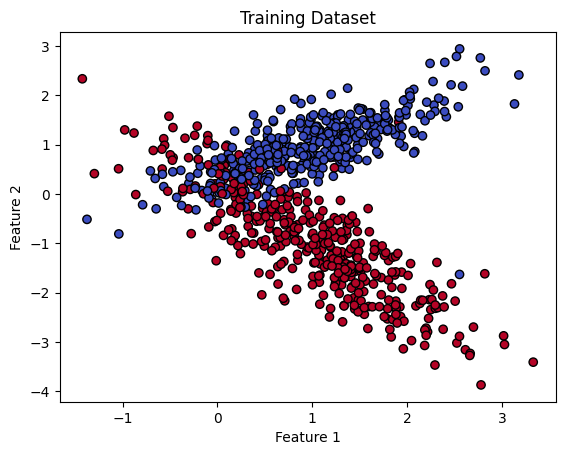

Gamma: 0.1, Train Accuracy: 0.90, Test Accuracy: 0.90
Gamma: 1, Train Accuracy: 0.93, Test Accuracy: 0.90
Gamma: 10, Train Accuracy: 0.94, Test Accuracy: 0.91
Gamma: 100, Train Accuracy: 0.97, Test Accuracy: 0.90


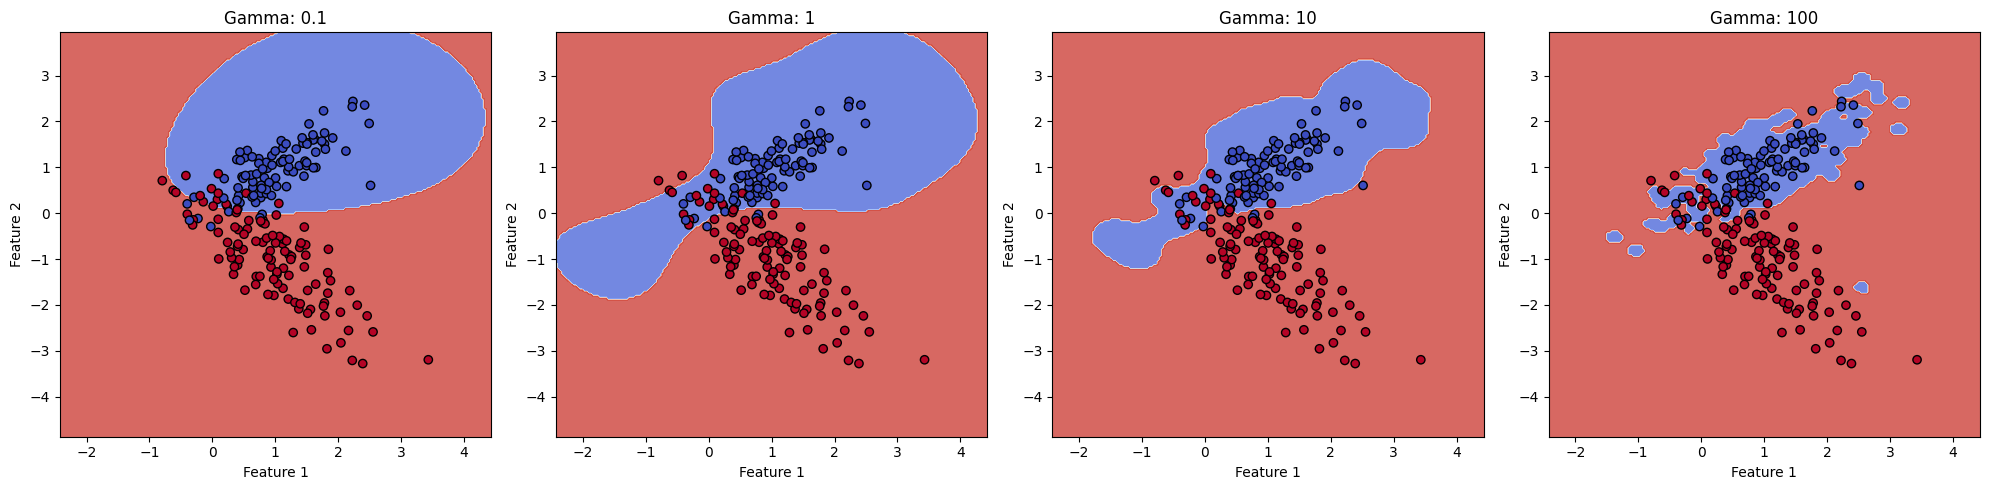

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# (a) Create a dataset with more samples
X, y = make_classification(n_samples=1000, n_features=2, n_classes=2, 
                           n_clusters_per_class=1, n_redundant=0, random_state=1)

# (b) Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Display the training data
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='coolwarm', edgecolors='k')
plt.title('Training Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# (c) Build the RBF model and test multiple gamma values
gamma_values = [0.1, 1, 10, 100]
models = []
accuracies_train = []
accuracies_test = []

for gamma in gamma_values:
    # Build the RBF model using SVM
    model = SVC(kernel='rbf', gamma=gamma)
    model.fit(X_train, y_train)
    models.append(model)
    
    # Predict and calculate accuracy for the training set
    y_train_pred = model.predict(X_train)
    acc_train = accuracy_score(y_train, y_train_pred)
    accuracies_train.append(acc_train)
    
    # Predict and calculate accuracy for the testing set
    y_test_pred = model.predict(X_test)
    acc_test = accuracy_score(y_test, y_test_pred)
    accuracies_test.append(acc_test)

    print(f"Gamma: {gamma}, Train Accuracy: {acc_train:.2f}, Test Accuracy: {acc_test:.2f}")

# (d) Plot the decision boundaries for different gamma values
fig, axes = plt.subplots(1, 4, figsize=(20, 5))
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))

for idx, (model, gamma) in enumerate(zip(models, gamma_values)):
    # Predict the class for each point in the grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary
    axes[idx].contourf(xx, yy, Z, alpha=0.8, cmap='coolwarm')
    
    # Scatter plot of the test data points
    axes[idx].scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolors='k', cmap='coolwarm')
    axes[idx].set_title(f"Gamma: {gamma}")
    axes[idx].set_xlabel("Feature 1")
    axes[idx].set_ylabel("Feature 2")

plt.tight_layout()
plt.show()

# 3

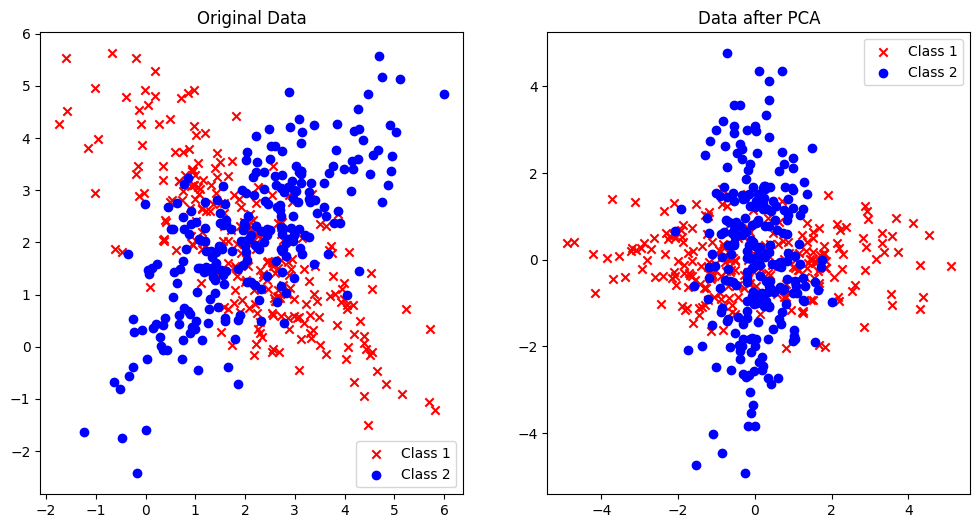

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from sklearn.decomposition import PCA

# Set the random seed for reproducibility
np.random.seed(0)
num_samp = 250

# Define the mean vectors and covariance matrices
mu1 = [2, 2]
mu2 = [2, 2]
sigma1 = [[2, -1.5], [-1.5, 2]]
sigma2 = [[2, 1.5], [1.5, 2]]

# Generate data from multivariate normal distributions
class1 = np.random.multivariate_normal(mu1, sigma1, num_samp)
class2 = np.random.multivariate_normal(mu2, sigma2, num_samp)

# Combine the data and create labels
data = np.vstack((class1, class2))
labels = np.hstack((np.ones(num_samp), 2 * np.ones(num_samp)))

# Apply PCA to reduce the dimensionality
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data)

# Plot the original data before applying PCA
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(data[labels == 1, 0], data[labels == 1, 1], c='r', marker='x', label='Class 1')
plt.scatter(data[labels == 2, 0], data[labels == 2, 1], c='b', marker='o', label='Class 2')
plt.title('Original Data')
plt.legend()

# Plot the data after applying PCA
plt.subplot(1, 2, 2)
plt.scatter(data_pca[labels == 1, 0], data_pca[labels == 1, 1], c='r', marker='x', label='Class 1')
plt.scatter(data_pca[labels == 2, 0], data_pca[labels == 2, 1], c='b', marker='o', label='Class 2')
plt.title('Data after PCA')
plt.legend()

plt.show()


# 4

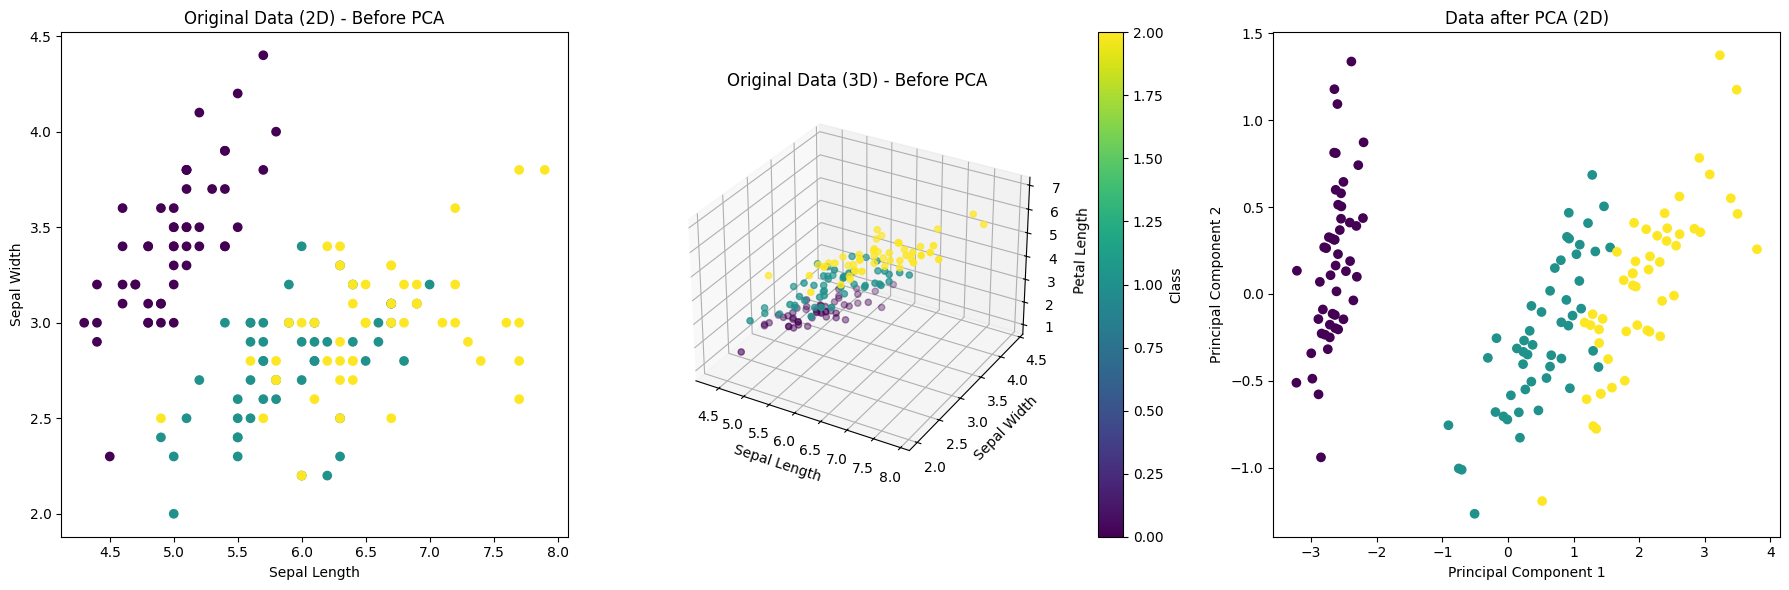

In [2]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

# Load the Iris dataset
iris = load_iris()
data = iris.data
target = iris.target

# Create a figure for plotting
fig = plt.figure(figsize=(18, 6))

# Plot the original data in 2D (using the first two features)
ax1 = fig.add_subplot(1, 3, 1)
ax1.scatter(data[:, 0], data[:, 1], c=target, cmap='viridis')
ax1.set_xlabel('Sepal Length')
ax1.set_ylabel('Sepal Width')
ax1.set_title('Original Data (2D) - Before PCA')

# Plot the original data in 3D (using the first three features)
ax2 = fig.add_subplot(1, 3, 2, projection='3d')
scatter = ax2.scatter(data[:, 0], data[:, 1], data[:, 2], c=target, cmap='viridis')
ax2.set_xlabel('Sepal Length')
ax2.set_ylabel('Sepal Width')
ax2.set_zlabel('Petal Length')
ax2.set_title('Original Data (3D) - Before PCA')

# Add color bar to the 3D plot
colorbar = fig.colorbar(scatter, ax=ax2, pad=0.1)
colorbar.set_label('Class')

# Apply PCA
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data)

# Plot the PCA result (2D)
ax3 = fig.add_subplot(1, 3, 3)
ax3.scatter(data_pca[:, 0], data_pca[:, 1], c=target, cmap='viridis')
ax3.set_xlabel('Principal Component 1')
ax3.set_ylabel('Principal Component 2')
ax3.set_title('Data after PCA (2D)')

plt.tight_layout()
plt.show()
